## In this notebook, Dimensionality Reduction for Images is performed

#### Import libraries

In [1]:
#import statements
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

#### Read sample image

(189, 200, 4)


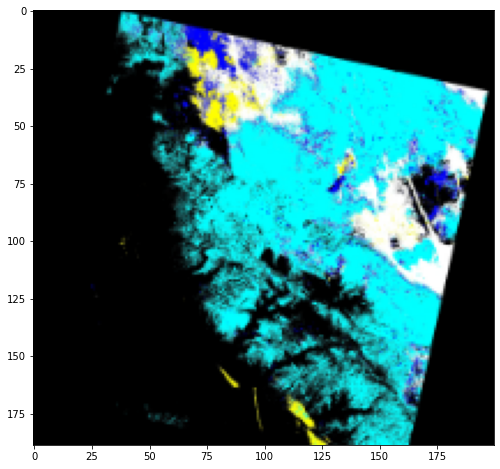

In [3]:
#Read the sample image
image_raw = imread("data/train/anomaly/anomaly (23).png")
print(image_raw.shape)

# Displaying the image
plt.figure(figsize=[12,8])
plt.imshow(image_raw)

#### Preprocess

##### 1. Normalize the RGB values of the image

(189, 200)
1.0


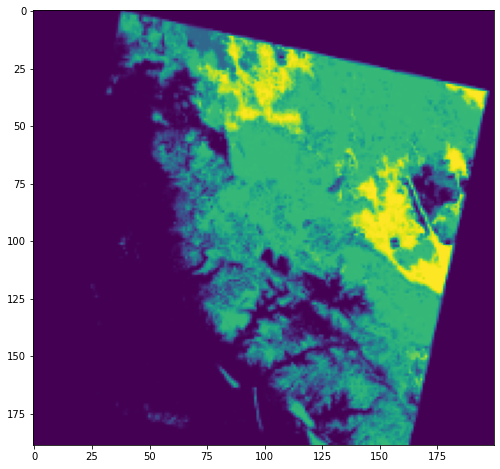

In [5]:
#take the sum of pixel values of the image
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

#to normalize, divide by the maximum value of pixel in the image
image_bw = image_sum/image_sum.max()
print(image_bw.max())

#Plot the normalized image
plt.figure(figsize=[12,8])
plt.imshow(image_bw)

#### PCA


Number of components explaining 95% variance: 21


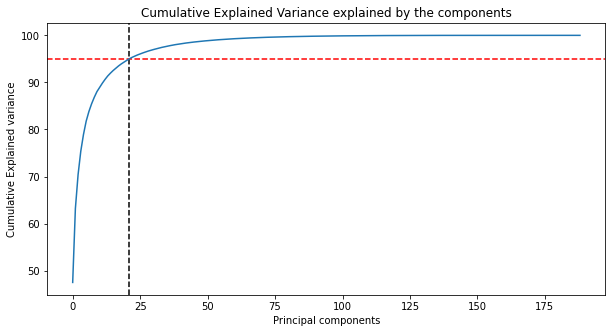

In [6]:
# Import the required libraries 
from sklearn.decomposition import PCA, IncrementalPCA

#Instanciate the PCA algorithm
pca = PCA()

#Fit the algorithm
pca.fit(image_bw)

#Calculate variance explained
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

#get the number of components explaining 95% of the variance
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

#Plot the principal components against the explained variance
plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

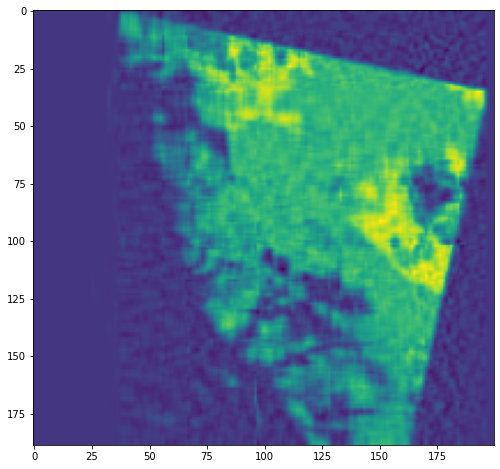

In [7]:
# Perform Incremental PCA for image re-construction
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon)

#### Interpretation :
The sample image is normalized and has reduced dimensionality, which can help in performance for heavier load models like Isolation Forests and Convolutional Neural Networks. As they are both beyond the scope of this degree, they are not included in this repository.

##### Note : In the above notebook, PCA is performed only for 1 sample image, due to complexity of udacity's project. This algorithm is performed for all 167 images.